**_Importing All The Necessary Libraries_**

In [272]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import seaborn as sns

**_Web Scraping Website For Gathering Covid Data_**

In [274]:
url = 'https://www.worldometers.info/coronavirus/'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')

table = soup.find('table', id='main_table_countries_today')
column_names = [header.text.strip() for header in table.find_all('th')]
row_data = table.find_all('tr')

data = []

for row in row_data:
    table_row = row.find_all('td')
    table_row_data = [data.text.strip() for data in table_row]
    if len(table_row_data) > 0:
            data.append(table_row_data)

**_Putting The Gathered Data Into DataFrame_**

In [276]:
df = pd.DataFrame(data, columns= column_names)
df.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/\n1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,,North America,"131,889,132",,"1,695,941",,"127,665,129",+350,"2,528,062","6,095",...,,,,North America,,,,,,
1,,Asia,"221,500,265",,"1,553,662",,"205,673,091",,"14,273,512","14,733",...,,,,Asia,,,,,,
2,,Europe,"253,406,198",,"2,101,824",,"248,754,104",+474,"2,550,270","4,453",...,,,,Europe,,,,,,
3,,South America,"70,200,879",,"1,367,332",,"66,683,585",,"2,149,962","8,953",...,,,,South America,,,,,,
4,,Oceania,"14,895,771",,"33,015",,"14,752,388",,"110,368",31,...,,,,Australia/Oceania,,,,,,


**_Dropping Unnecessary Columns From Our DataFrame_**

In [278]:
df = df.drop(columns = ['1 Caseevery X ppl',
       '1 Deathevery X ppl', '1 Testevery X ppl', 'New Cases/1M pop',
       'New Deaths/1M pop', 'Active Cases/1M pop','NewCases', 'NewDeaths', 'NewRecovered', 'Serious,Critical', '#', 'Deaths/1M pop', 'Tests/\n1M pop' ])

In [279]:
df.head()

,"Country,Other",TotalCases,TotalDeaths,TotalRecovered,ActiveCases,Tot Cases/1M pop,TotalTests,Population,Continent
0,North America,"131,889,132","1,695,941","127,665,129","2,528,062",,,,North America
1,Asia,"221,500,265","1,553,662","205,673,091","14,273,512",,,,Asia
2,Europe,"253,406,198","2,101,824","248,754,104","2,550,270",,,,Europe
3,South America,"70,200,879","1,367,332","66,683,585","2,149,962",,,,South America
4,Oceania,"14,895,771","33,015","14,752,388","110,368",,,,Australia/Oceania


In [280]:
df.dtypes

Country,Other       object
TotalCases          object
TotalDeaths         object
TotalRecovered      object
ActiveCases         object
Tot Cases/1M pop    object
TotalTests          object
Population          object
Continent           object
dtype: object

**_Converting Column dtypes From Object To Numeric_**

In [282]:
df['TotalCases'] = pd.to_numeric(df['TotalCases'].str.replace(',', ''), errors='coerce')
df['TotalDeaths'] = pd.to_numeric(df['TotalDeaths'].str.replace(',', ''), errors='coerce')
df['TotalRecovered'] = pd.to_numeric(df['TotalRecovered'].str.replace(',', ''), errors='coerce')
df['ActiveCases'] = pd.to_numeric(df['ActiveCases'].str.replace(',', ''), errors='coerce')
df['Population'] = pd.to_numeric(df['Population'].str.replace(',', ''), errors='coerce')

In [283]:
df.dtypes

Country,Other        object
TotalCases            int64
TotalDeaths         float64
TotalRecovered      float64
ActiveCases         float64
Tot Cases/1M pop     object
TotalTests           object
Population          float64
Continent            object
dtype: object

**_Renaming Our DataFrame Columns_**

In [285]:
df = df.rename(columns= { 'Country,Other' : 'Country', 'TotalCases': 'Total Cases',
                         'TotalDeaths' : 'Total Deaths','TotalRecovered': 'Total Recovered', 'ActiveCases' : 'Active Cases',
                         'TotalTests' : 'Total Tests' })

In [286]:
df.head(15)

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Tot Cases/1M pop,Total Tests,Population,Continent
0,North America,131889132,1695941.0,127665129.0,2528062.0,,,NaN,North America
1,Asia,221500265,1553662.0,205673091.0,14273512.0,,,NaN,Asia
2,Europe,253406198,2101824.0,248754104.0,2550270.0,,,NaN,Europe
3,South America,70200879,1367332.0,66683585.0,2149962.0,,,NaN,South America
4,Oceania,14895771,33015.0,14752388.0,110368.0,,,NaN,Australia/Oceania
5,Africa,12860924,258892.0,12090808.0,511224.0,,,NaN,Africa
6,,721,15.0,706.0,0.0,,,NaN,
7,World,704753890,7010681.0,675619811.0,22123398.0,"90,413",,NaN,All
8,USA,111820082,1219487.0,109814428.0,786167.0,"333,985","1,186,851,502",3.348053e+08,North America
9,India,45035393,533570.0,NaN,NaN,"32,016","935,879,495",1.406632e+09,Asia


In [287]:
df = df.drop(index=6)
df.reset_index(drop=True)

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Tot Cases/1M pop,Total Tests,Population,Continent
0,North America,131889132,1695941.0,127665129.0,2528062.0,,,NaN,North America
1,Asia,221500265,1553662.0,205673091.0,14273512.0,,,NaN,Asia
2,Europe,253406198,2101824.0,248754104.0,2550270.0,,,NaN,Europe
3,South America,70200879,1367332.0,66683585.0,2149962.0,,,NaN,South America
4,Oceania,14895771,33015.0,14752388.0,110368.0,,,NaN,Australia/Oceania
...,...,...,...,...,...,...,...,...,...
241,Total:,70200879,1367332.0,66683585.0,2149962.0,,,NaN,South America
242,Total:,14895771,33015.0,14752388.0,110368.0,,,NaN,Australia/Oceania
243,Total:,12860924,258892.0,12090808.0,511224.0,,,NaN,Africa
244,Total:,721,15.0,706.0,0.0,,,NaN,


**_Making A Separate DataFrame For Continents Data_**

In [289]:
continent_df = df[0:6]
continent_df

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Tot Cases/1M pop,Total Tests,Population,Continent
0,North America,131889132,1695941.0,127665129.0,2528062.0,,,NaN,North America
1,Asia,221500265,1553662.0,205673091.0,14273512.0,,,NaN,Asia
2,Europe,253406198,2101824.0,248754104.0,2550270.0,,,NaN,Europe
3,South America,70200879,1367332.0,66683585.0,2149962.0,,,NaN,South America
4,Oceania,14895771,33015.0,14752388.0,110368.0,,,NaN,Australia/Oceania
5,Africa,12860924,258892.0,12090808.0,511224.0,,,NaN,Africa


**_Dropping Unnecessary Columns From Continents DataFrame_**

In [291]:
continent_df = continent_df.drop(columns = ['Total Tests', 'Population', 'Country'])

In [292]:
continent_df

,Total Cases,Total Deaths,Total Recovered,Active Cases,Tot Cases/1M pop,Continent
0,131889132,1695941.0,127665129.0,2528062.0,,North America
1,221500265,1553662.0,205673091.0,14273512.0,,Asia
2,253406198,2101824.0,248754104.0,2550270.0,,Europe
3,70200879,1367332.0,66683585.0,2149962.0,,South America
4,14895771,33015.0,14752388.0,110368.0,,Australia/Oceania
5,12860924,258892.0,12090808.0,511224.0,,Africa


**_Making A Separate DataFrame For World Data Only_**

In [294]:
world_df = df[6:7]
world_df

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Tot Cases/1M pop,Total Tests,Population,Continent
7,World,704753890,7010681.0,675619811.0,22123398.0,"90,413",,NaN,All


**_Making A Separate DataFrame For Country Wise Data_**

In [296]:
df = df[7:238]

In [297]:
df.head()

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Tot Cases/1M pop,Total Tests,Population,Continent
8,USA,111820082,1219487.0,109814428.0,786167.0,"333,985","1,186,851,502",3.348053e+08,North America
9,India,45035393,533570.0,NaN,NaN,"32,016","935,879,495",1.406632e+09,Asia
10,France,40138560,167642.0,39970918.0,0.0,"612,013","271,490,188",6.558452e+07,Europe
11,Germany,38828995,183027.0,38240600.0,405368.0,"462,891","122,332,384",8.388360e+07,Europe
12,Brazil,38743918,711380.0,36249161.0,1783377.0,"179,908","63,776,166",2.153536e+08,South America


**_Entering Total Recovered Values Of Some Countries Manually Becuase They Were Missing From The DataFrame_**

In [299]:
df.loc[df['Country'] == 'India', 'Total Recovered'] = 44501206 
df.loc[df['Country'] == 'Japan', 'Total Recovered'] = 21725273
df.loc[df['Country'] == 'Turkey', 'Total Recovered'] = 17129892 
df.loc[df['Country'] == 'Iran', 'Total Recovered'] = 7377233

**_Cleaning Our Data (Dropping Null Values)_**

In [301]:
df['Active Cases'] = df['Active Cases'].fillna('0')

In [302]:
df.head()

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Tot Cases/1M pop,Total Tests,Population,Continent
8,USA,111820082,1219487.0,109814428.0,786167.0,"333,985","1,186,851,502",3.348053e+08,North America
9,India,45035393,533570.0,44501206.0,0,"32,016","935,879,495",1.406632e+09,Asia
10,France,40138560,167642.0,39970918.0,0.0,"612,013","271,490,188",6.558452e+07,Europe
11,Germany,38828995,183027.0,38240600.0,405368.0,"462,891","122,332,384",8.388360e+07,Europe
12,Brazil,38743918,711380.0,36249161.0,1783377.0,"179,908","63,776,166",2.153536e+08,South America


VISUALIZATION 
=========

**_Bar Plot OF Each Continent With Total Number Of Cases_**

In [305]:
sns.set(rc={'figure.figsize':(16,5)})

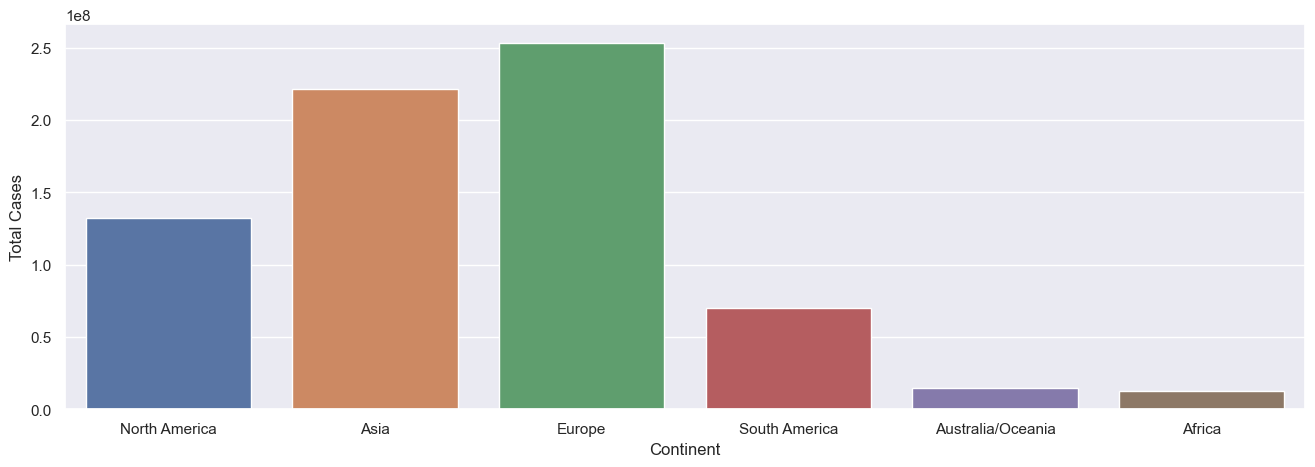

In [306]:
ax = sns.barplot(x='Continent', y='Total Cases', data = continent_df)

**_Labeling Our Continents Data Bar Plot_**

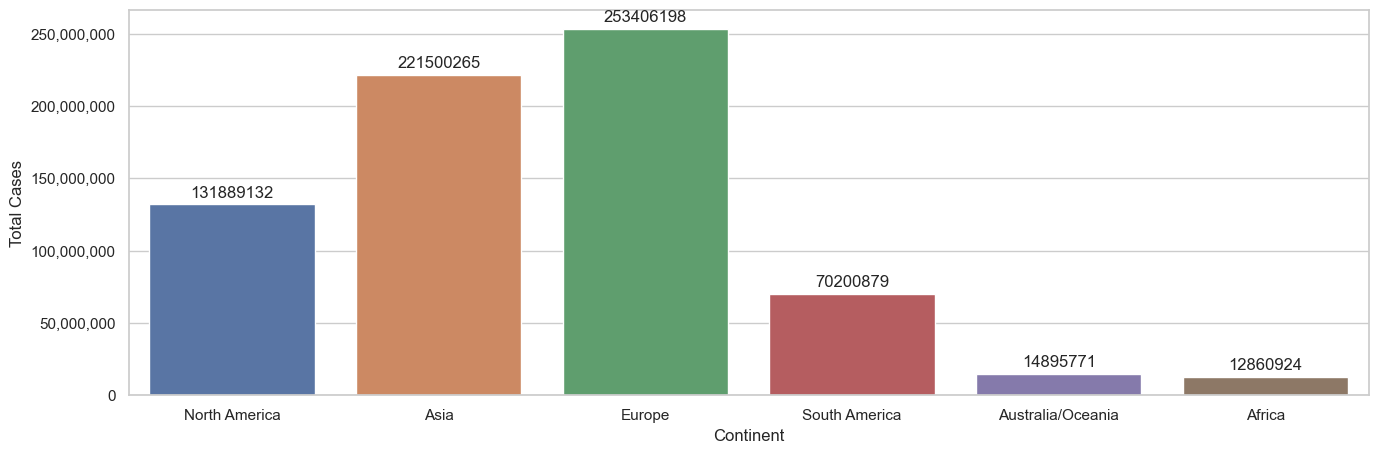

In [308]:
def human_format(x, pos):
    return f'{int(x):,}'
sns.set(style="whitegrid")
ax = sns.barplot(x='Continent', y='Total Cases', data=continent_df)
ax.yaxis.set_major_formatter(FuncFormatter(human_format))

ax.bar_label(ax.containers[0], fmt='%.0f', label_type='edge', padding=3)
plt.show()

_As We Can See That Europe Has Largest Number Of Cases Recorded.
Now We Will Analyze Which Countries Has Most Number Of Cases In Each Continent_

Continent Wise Analysis
---------

In [311]:
countinent_group = df.groupby(['Continent'])

In [312]:
europe = countinent_group.get_group('Europe')
asia = countinent_group.get_group('Asia')
north_america = countinent_group.get_group('North America')
south_america = countinent_group.get_group('South America')
oceania = countinent_group.get_group('Australia/Oceania')
africa = countinent_group.get_group('Africa')

Top 10 Countries With Most Cases In Europe
---------

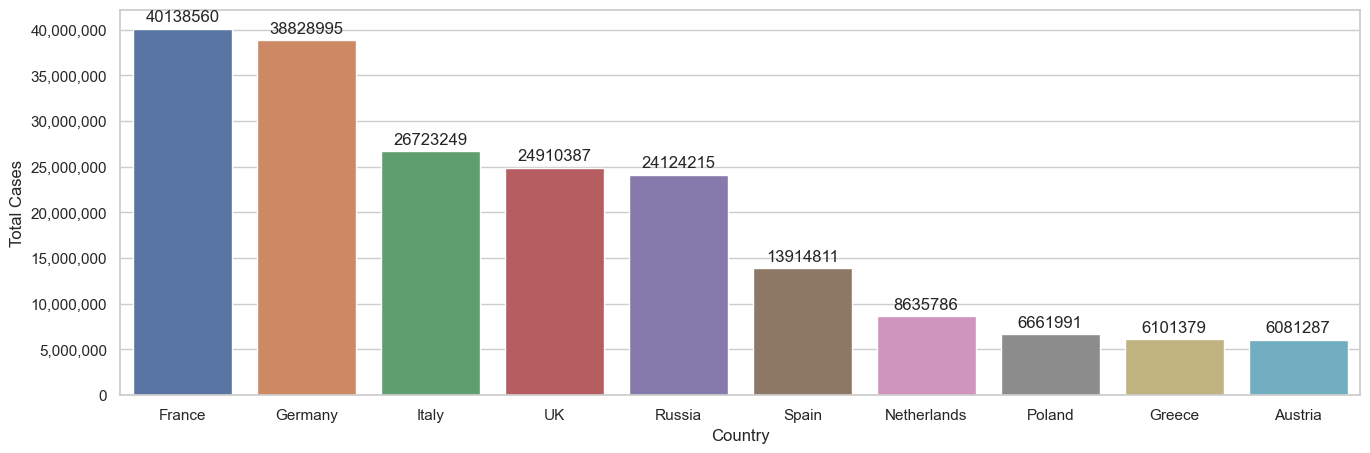

In [314]:
europe_top_10 = europe.nlargest(10, 'Total Cases')
def human_format(x, pos):
    return f'{int(x):,}'
sns.set(style="whitegrid")
eur = sns.barplot(x='Country', y='Total Cases', data= europe_top_10 )
eur.yaxis.set_major_formatter(FuncFormatter(human_format))

eur.bar_label(eur.containers[0], fmt='%.0f', label_type='edge', padding=3)
plt.show()

Top 10 Countries With Most Cases In Asia
---------

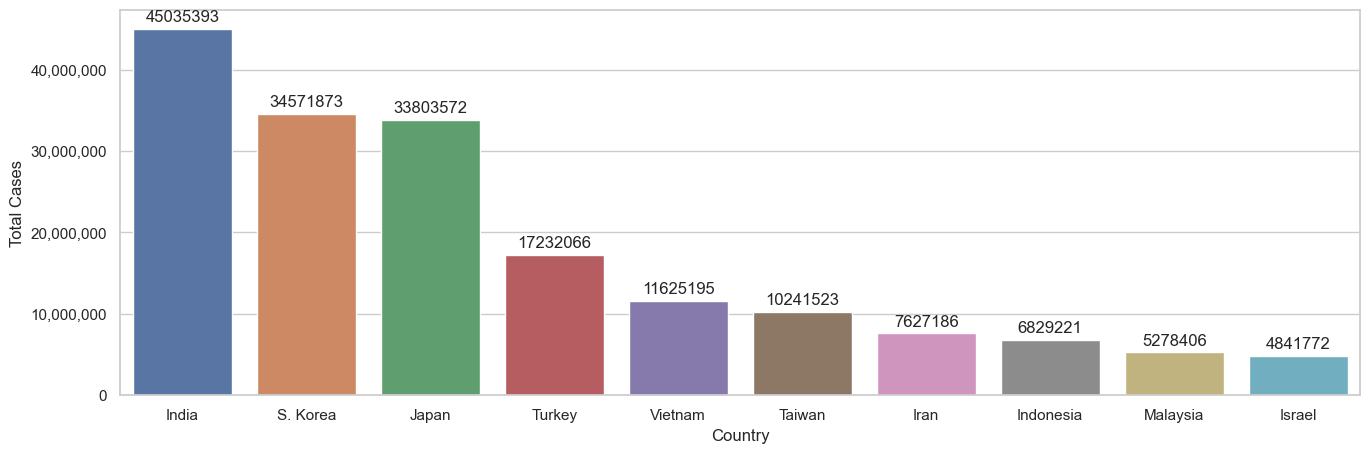

In [316]:
asia_top_10 = asia.nlargest(10, 'Total Cases')
def human_format(x, pos):
    return f'{int(x):,}'
sns.set(style="whitegrid")
asia_ = sns.barplot(x='Country', y='Total Cases', data= asia_top_10 )
asia_.yaxis.set_major_formatter(FuncFormatter(human_format))

asia_.bar_label(asia_.containers[0], fmt='%.0f', label_type='edge', padding=3)
plt.show()

Top 10 Countries With Most Cases In North America
---------

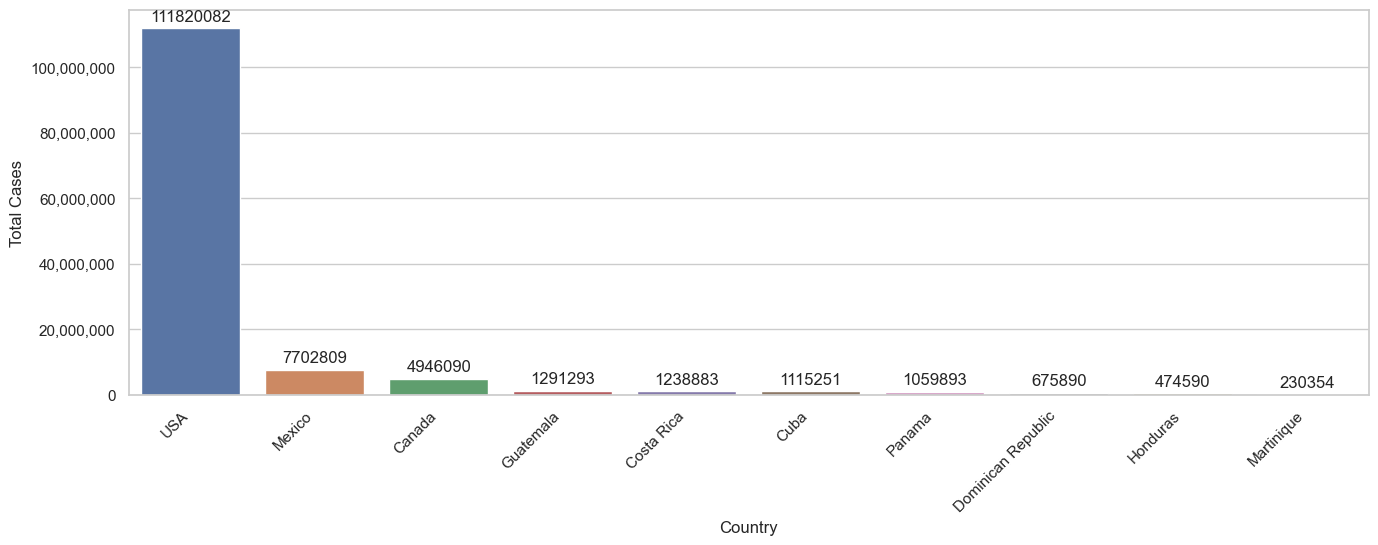

In [318]:
north_america_top_10 = north_america.nlargest(10, 'Total Cases')
def human_format(x, pos):
    return f'{int(x):,}'
sns.set(style="whitegrid")
na = sns.barplot(x='Country', y='Total Cases', data= north_america_top_10 )
na.yaxis.set_major_formatter(FuncFormatter(human_format))

na.bar_label(na.containers[0], fmt='%.0f', label_type='edge', padding=3)
plt.xticks(rotation=45, ha='right')
plt.show()

Top 10 Countries With Most Cases In South America
---------

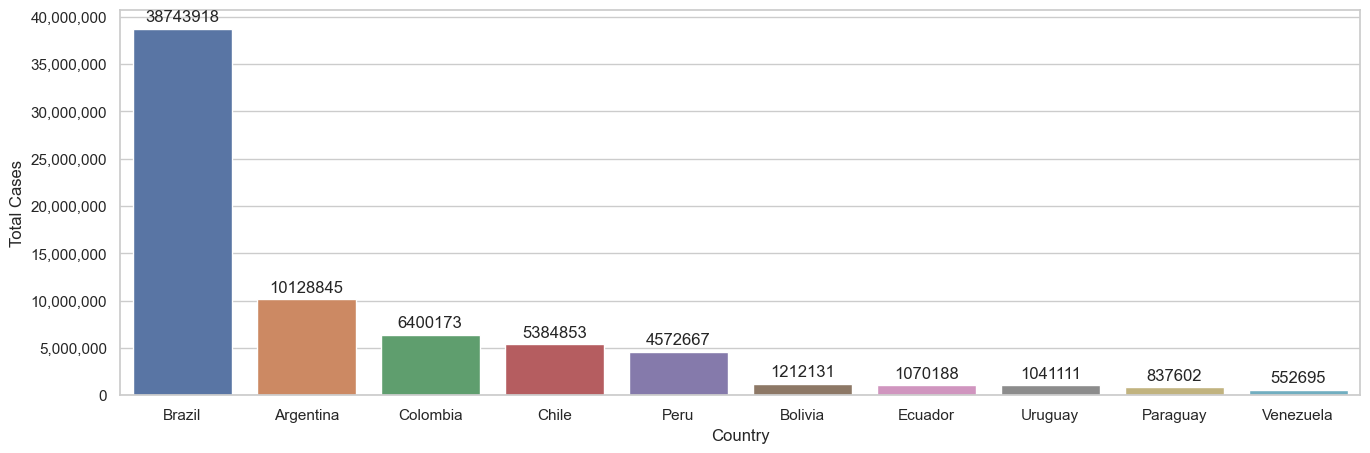

In [320]:
south_america_top_10 = south_america.nlargest(10, 'Total Cases')
def human_format(x, pos):
    return f'{int(x):,}'
sns.set(style="whitegrid")
sa = sns.barplot(x='Country', y='Total Cases', data= south_america_top_10 )
sa.yaxis.set_major_formatter(FuncFormatter(human_format))

sa.bar_label(sa.containers[0], fmt='%.0f', label_type='edge', padding=3)
plt.show()

Top 10 Countries With Most Cases In Oceania
---------

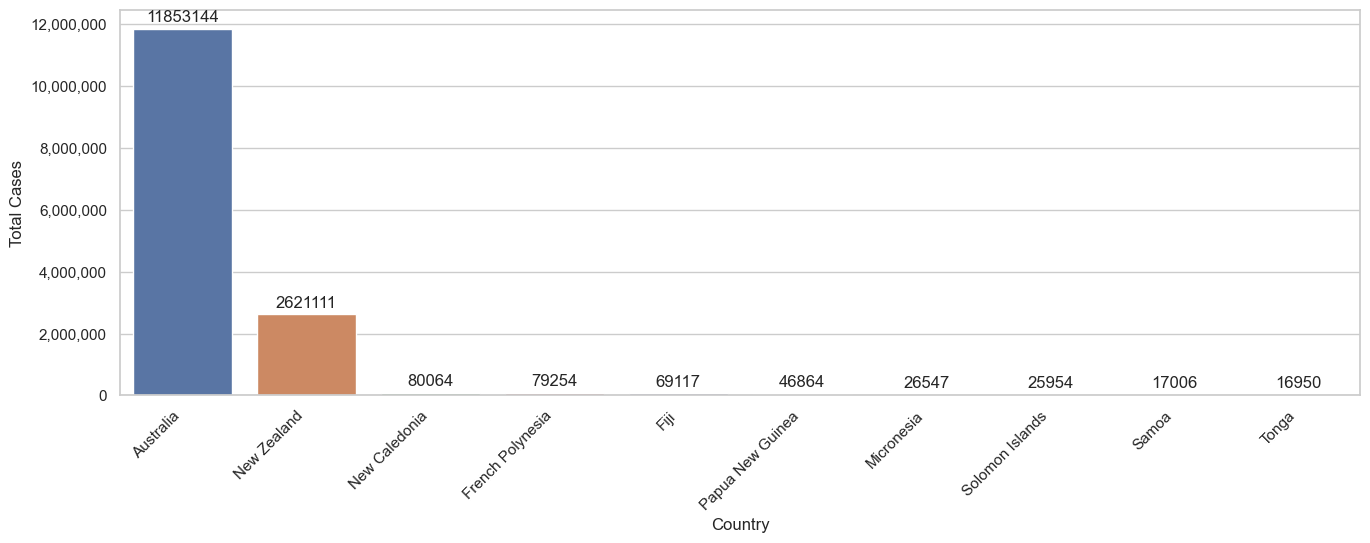

In [322]:
oceania_top_10 = oceania.nlargest(10, 'Total Cases')
def human_format(x, pos):
    return f'{int(x):,}'
sns.set(style="whitegrid")
oc = sns.barplot(x='Country', y='Total Cases', data= oceania_top_10 )
oc.yaxis.set_major_formatter(FuncFormatter(human_format))

oc.bar_label(oc.containers[0], fmt='%.0f', label_type='edge', padding=3)
plt.xticks(rotation=45, ha='right')
plt.show()

Top 10 Countries With Most Cases In Africa
==========

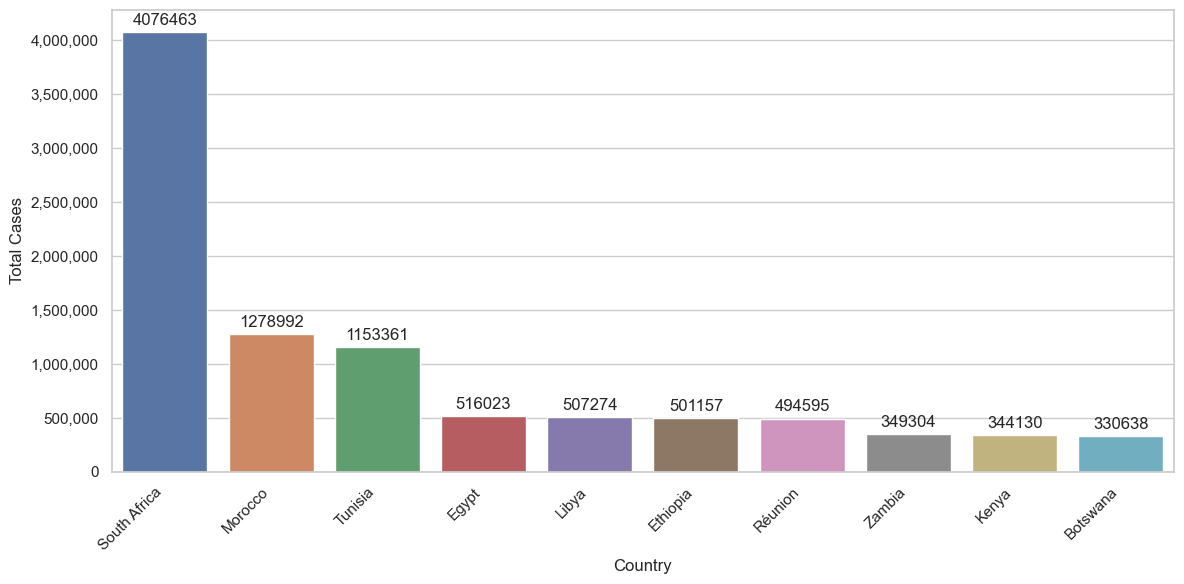

In [324]:
africa_top_10 = africa.nlargest(10, 'Total Cases')
def human_format(x, pos):
    return f'{int(x):,}'
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
af = sns.barplot(x='Country', y='Total Cases', data=africa_top_10)
af.yaxis.set_major_formatter(FuncFormatter(human_format))
for container in af.containers:
    af.bar_label(container, fmt='%.0f', label_type='edge', padding=3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

 TOP 10 COUNTRIES WITH MOST CASES ALL OVER THE WORLD
 ---

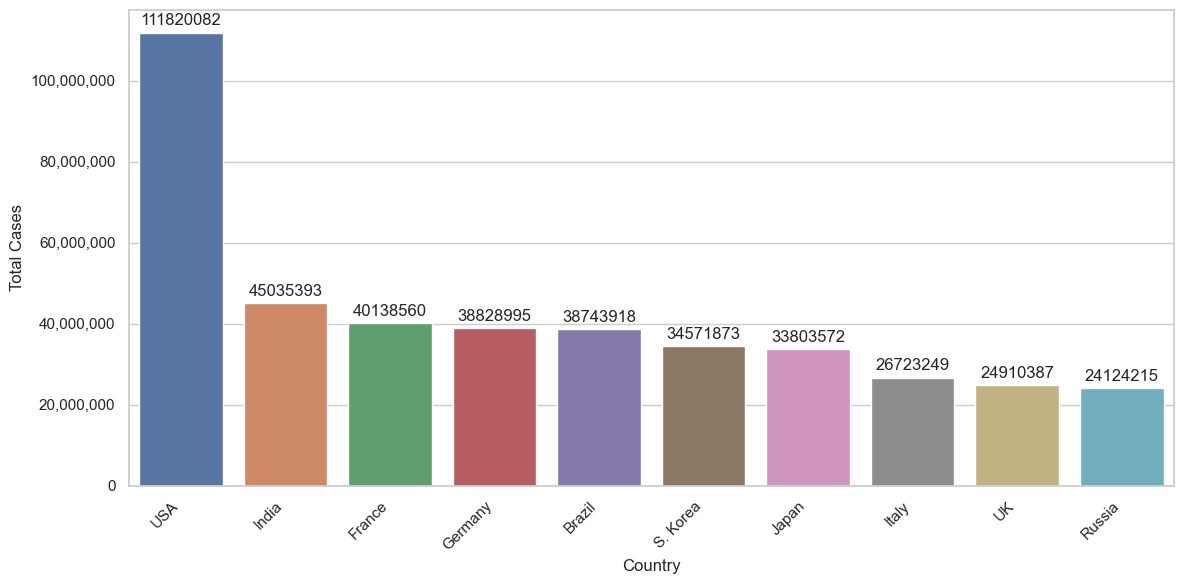

In [326]:
world = df.nlargest(10, 'Total Cases')
def human_format(x, pos):
    return f'{int(x):,}'
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
wr = sns.barplot(x='Country', y='Total Cases', data=world)
wr.yaxis.set_major_formatter(FuncFormatter(human_format))
wr.bar_label(wr.containers[0], fmt='%.0f', label_type='edge', padding=3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

Plotting A Line Graph To Differentiate Between Total Cases, Total Recovered And Deaths In Top 20 Countries
--

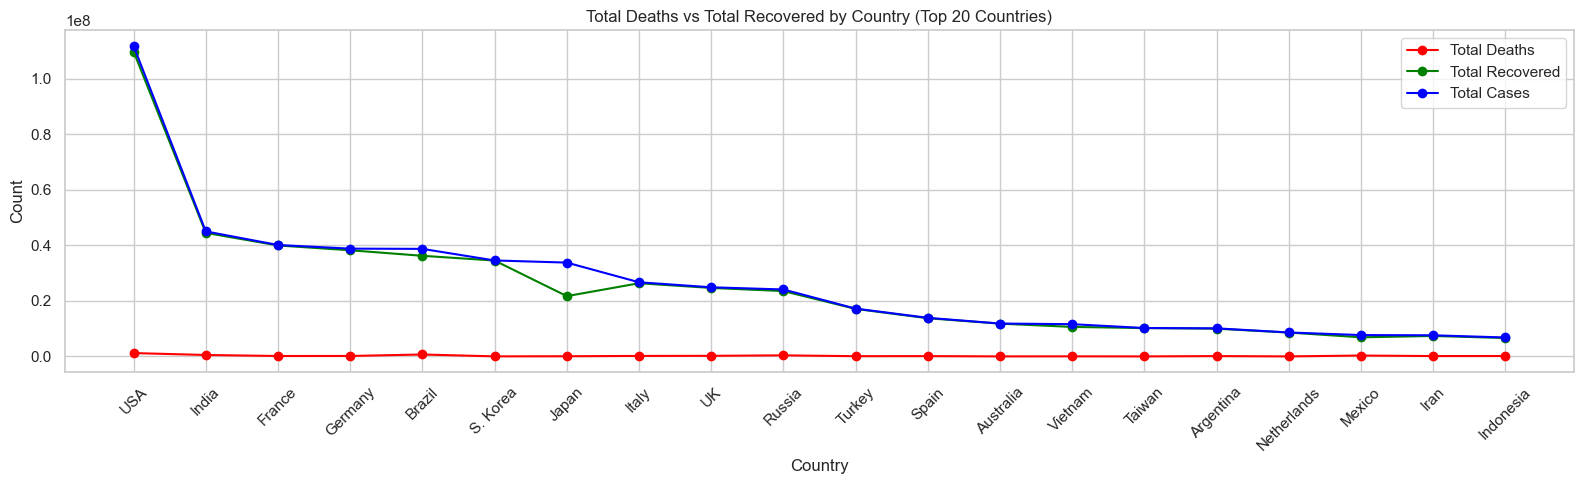

In [328]:
top_20_countries = df.nlargest(20, 'Total Cases')

plt.plot(top_20_countries['Country'], top_20_countries['Total Deaths'], label='Total Deaths', color='red', marker='o')
plt.plot(top_20_countries['Country'], top_20_countries['Total Recovered'], label='Total Recovered', color='green', marker='o')
plt.plot(top_20_countries['Country'], top_20_countries['Total Cases'], label='Total Cases', color='blue', marker='o')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Total Deaths vs Total Recovered by Country (Top 20 Countries)')
plt.legend()
plt.tight_layout()
plt.show()

_Above Line Graph shows that Japan is the country with least number of recoveries followed by Brazil and Usa,
As also shown in Bar Plot Below_

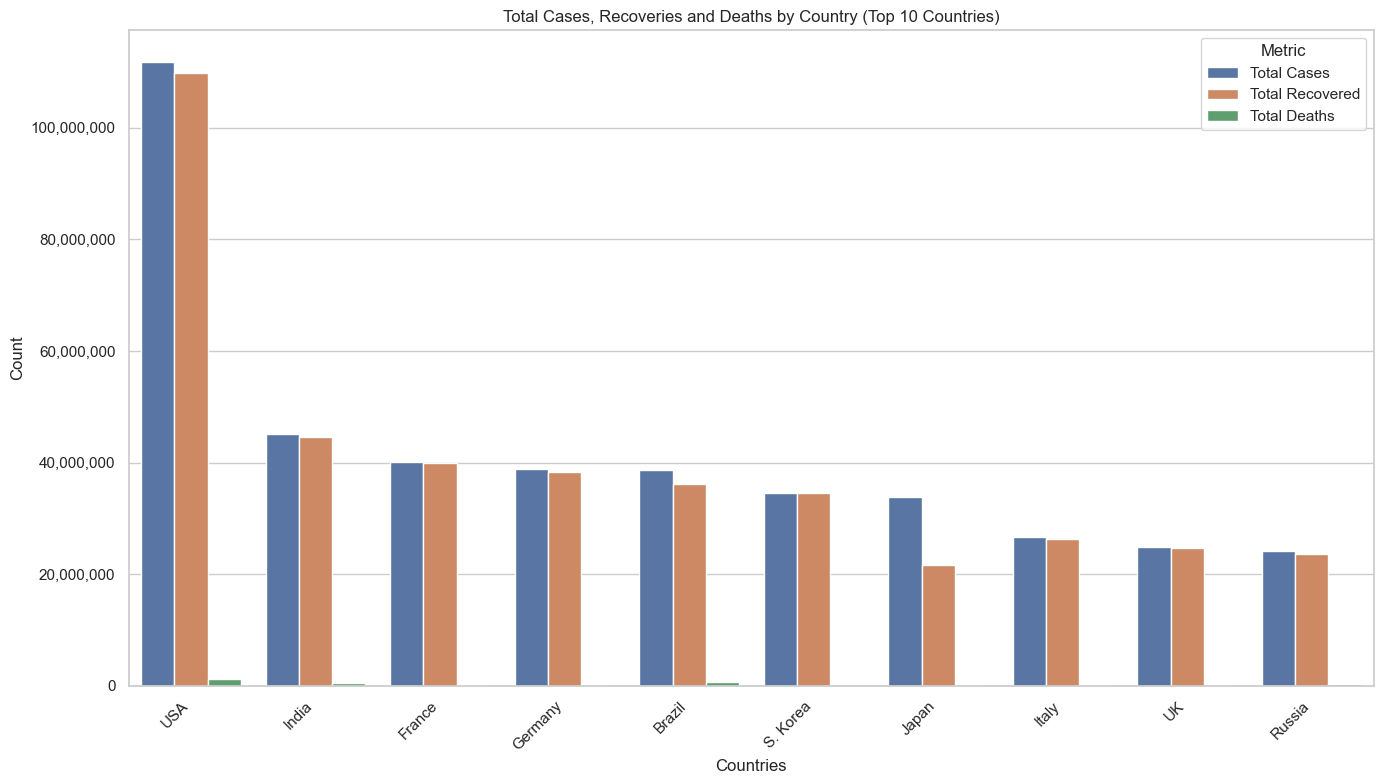

In [330]:
top_10_countries = df.nlargest(10, 'Total Cases')

top_10_countries = top_10_countries[['Country', 'Total Cases', 'Total Recovered', 'Total Deaths']]
top_10_countries.set_index('Country', inplace=True)
top_10_countries = top_10_countries.stack().reset_index()
top_10_countries.columns = ['Country', 'Metric', 'Count']

def human_format(x, pos):
    return f'{int(x):,}'

sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))
g = sns.barplot(x='Country', y='Count', hue='Metric', data=top_10_countrie)
g.yaxis.set_major_formatter(FuncFormatter(human_format))

plt.xticks(rotation=45, ha='right')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Total Cases, Recoveries and Deaths by Country (Top 10 Countries)')
plt.tight_layout()
plt.show()